In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.style.use("grayscale")

In [3]:
df = pd.read_csv("./space/pulsar_stars.csv")

In [4]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [5]:
df["target_class"].value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

In [6]:
X = df.drop(["target_class"], axis=1).values
X.shape

(17898, 8)

In [7]:
y = df["target_class"]
y.shape

(17898,)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)
X_train_std.shape, X_test_std.shape

((12528, 8), (5370, 8))

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score

log = LogisticRegression().fit(X_train_std, y_train)
y_pred = log.predict(X_test_std)
print("\nClassification Report\n\n", classification_report(y_test, y_pred))
print("Accuracy: %s" % accuracy_score(y_test, y_pred))
print("Balanced Accuracy: %s" % balanced_accuracy_score(y_test, y_pred))


Classification Report

               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4878
           1       0.94      0.82      0.87       492

    accuracy                           0.98      5370
   macro avg       0.96      0.91      0.93      5370
weighted avg       0.98      0.98      0.98      5370

Accuracy: 0.9782122905027933
Balanced Accuracy: 0.9066828168281682


In [10]:
from algorithms import SimpleESClassifier
from algorithms import GeneticESClassifier
from algorithms import NaturalESClassifier
from algorithms import DifferentialEvolutionClassifier

def score(objective, iterations=100):
    ses = SimpleESClassifier(objective=objective, n_iter=iterations, random_state=0)
    ges = GeneticESClassifier(objective=objective, n_iter=iterations, random_state=0)
    nes = NaturalESClassifier(objective=objective, n_iter=iterations, random_state=0)
    dev = DifferentialEvolutionClassifier(objective=objective, n_iter=iterations * 10, random_state=0, bounds=(-20, 20))

    ses.fit(X_train_std, y_train)
    ges.fit(X_train_std, y_train)
    nes.fit(X_train_std, y_train)
    dev.fit(X_train_std, y_train)

    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    axes[0][0].set_title("Simple ES Score")
    axes[0][0].plot(range(iterations), ses.history_)
    axes[0][1].set_title("Genetic ES Score")
    axes[0][1].plot(range(iterations), ges.history_)
    axes[1][0].set_title("Natural ES Score")
    axes[1][0].plot(range(iterations), nes.history_)
    axes[1][1].set_title("Differential Evolution Score")
    axes[1][1].plot(range(iterations * 10), dev.history_)

    print("\nSimple ES Classification Report")
    y_pred = ses.predict(X_test_std)
    print(classification_report(y_test, y_pred))
    print("Accuracy: %s" % accuracy_score(y_test, y_pred))
    print("Balanced Accuracy: %s" % balanced_accuracy_score(y_test, y_pred))
    print("\nGenetic ES Classification Report")
    y_pred = ges.predict(X_test_std)
    print(classification_report(y_pred, y_test))
    print("Accuracy: %s" % accuracy_score(y_test, y_pred))
    print("Balanced Accuracy: %s" % balanced_accuracy_score(y_test, y_pred))
    print("\nNatural ES Classification Report")
    y_pred = nes.predict(X_test_std)
    print(classification_report(y_pred, y_test))
    print("Accuracy: %s" % accuracy_score(y_test, y_pred))
    print("Balanced Accuracy: %s" % balanced_accuracy_score(y_test, y_pred))
    print("\nDifferential Evolution Classification Report")
    y_pred = dev.predict(X_test_std)
    print(classification_report(y_pred, y_test))
    print("Accuracy: %s" % accuracy_score(y_test, y_pred))
    print("Balanced Accuracy: %s" % balanced_accuracy_score(y_test, y_pred))

100%|██████████| 1000/1000 [00:16<00:00, 59.40it/s]

Simple ES Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4878
           1       0.94      0.83      0.88       492

    accuracy                           0.98      5370
   macro avg       0.96      0.91      0.93      5370
weighted avg       0.98      0.98      0.98      5370

Accuracy: 0.9791433891992551
Balanced Accuracy: 0.910850358503585

Genetic ES Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4931
           1       0.83      0.93      0.88       439

    accuracy                           0.98      5370
   macro avg       0.91      0.96      0.93      5370
weighted avg       0.98      0.98      0.98      5370

Accuracy: 0.9793296089385475
Balanced Accuracy: 0.9136941369413694

Natural ES Classification Report
              precision    recall  f1-score   support

     

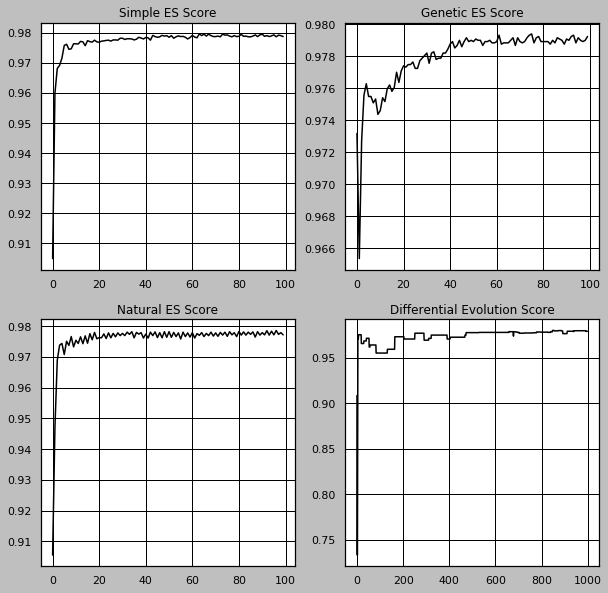

In [11]:
from objectives import CrossEntropyObjective

score(CrossEntropyObjective())

Let's try tweaking the NaturalES hyperparameters.

100%|██████████| 250/250 [00:20<00:00, 12.44it/s]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4932
           1       0.83      0.94      0.88       438

    accuracy                           0.98      5370
   macro avg       0.91      0.96      0.94      5370
weighted avg       0.98      0.98      0.98      5370

Accuracy: 0.9795158286778398
Balanced Accuracy: 0.9137966379663797


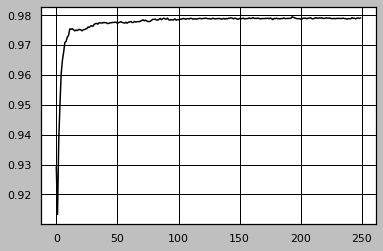

In [12]:
ges = GeneticESClassifier(objective=CrossEntropyObjective(), n_iter=250, random_state=0, n_pop=75, p_elite=0.15, sigma=0.1)
ges.fit(X_train_std, y_train)
plt.plot(range(250), ges.history_)
y_pred = ges.predict(X_test_std)
print(classification_report(y_pred, y_test))
print("Accuracy: %s" % accuracy_score(y_test, y_pred))
print("Balanced Accuracy: %s" % balanced_accuracy_score(y_test, y_pred))

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

ges = GeneticESClassifier(objective=CrossEntropyObjective(), n_iter=250, random_state=0, n_pop=75, p_elite=0.15, sigma=0.1)
ges = make_pipeline(StandardScaler(), ges)
ges_score = cross_val_score(ges, X, y)

log = make_pipeline(StandardScaler(), LogisticRegression())
log_score = cross_val_score(log, X, y)

100%|██████████| 250/250 [00:20<00:00, 12.13it/s]


In [14]:
print("GeneticESClassifier Accuracy: %0.5f (+/- %0.5f)" % (ges_score.mean(), ges_score.std() * 2))
print("LogisticRegression Accuracy:  %0.5f (+/- %0.5f)" % (log_score.mean(), log_score.std() * 2))

GeneticESClassifier Accuracy: 0.97860 (+/- 0.00431)
LogisticRegression Accuracy:  0.97810 (+/- 0.00488)


That went pretty well, so we'll look at another classification dataset.

In [15]:
df = pd.read_csv("./space/nasa.csv")

In [16]:
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [18]:
df["Hazardous"].value_counts()

False    3932
True      755
Name: Hazardous, dtype: int64

In [17]:
X = df[["Absolute Magnitude",
"Est Dia in Feet(min)",
"Est Dia in Feet(max)",
"Epoch Date Close Approach",
"Relative Velocity km per hr",
"Miles per hour",
"Miss Dist.(miles)",
"Orbit Uncertainity",
"Minimum Orbit Intersection",
"Jupiter Tisserand Invariant",
"Epoch Osculation",
"Eccentricity",
"Semi Major Axis",
"Inclination",
"Asc Node Longitude",
"Orbital Period",
"Perihelion Distance",
"Perihelion Arg",
"Aphelion Dist",
"Perihelion Time",
"Mean Anomaly",
"Mean Motion"]].values
X.shape

(4687, 22)

In [19]:
y = df["Hazardous"]
y.shape

(4687,)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=True, test_size=0.3, )
X_train.shape, X_test.shape

((3280, 22), (1407, 22))

In [21]:
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)
X_train_std.shape, X_test_std.shape

((3280, 22), (1407, 22))

In [22]:
log = LogisticRegression().fit(X_train_std, y_train)
y_pred = log.predict(X_test_std)
print("\nClassification Report\n\n", classification_report(y_test, y_pred))
print("Accuracy: %s" % accuracy_score(y_test, y_pred))
print("Balanced Accuracy: %s" % balanced_accuracy_score(y_test, y_pred))


Classification Report

               precision    recall  f1-score   support

       False       0.97      0.98      0.98      1181
        True       0.91      0.85      0.88       226

    accuracy                           0.96      1407
   macro avg       0.94      0.92      0.93      1407
weighted avg       0.96      0.96      0.96      1407

Accuracy: 0.9637526652452025
Balanced Accuracy: 0.9193704899852382


100%|██████████| 2500/2500 [00:15<00:00, 163.90it/s]

Simple ES Classification Report
              precision    recall  f1-score   support

       False       0.97      0.99      0.98      1181
        True       0.92      0.82      0.86       226

    accuracy                           0.96      1407
   macro avg       0.94      0.90      0.92      1407
weighted avg       0.96      0.96      0.96      1407

Accuracy: 0.9587775408670931
Balanced Accuracy: 0.9020947449663927

Genetic ES Classification Report
              precision    recall  f1-score   support

       False       0.98      0.98      0.98      1185
        True       0.88      0.89      0.88       222

    accuracy                           0.96      1407
   macro avg       0.93      0.93      0.93      1407
weighted avg       0.96      0.96      0.96      1407

Accuracy: 0.9630419331911869
Balanced Accuracy: 0.92789221673548

Natural ES Classification Report
              precision    recall  f1-score   support

     

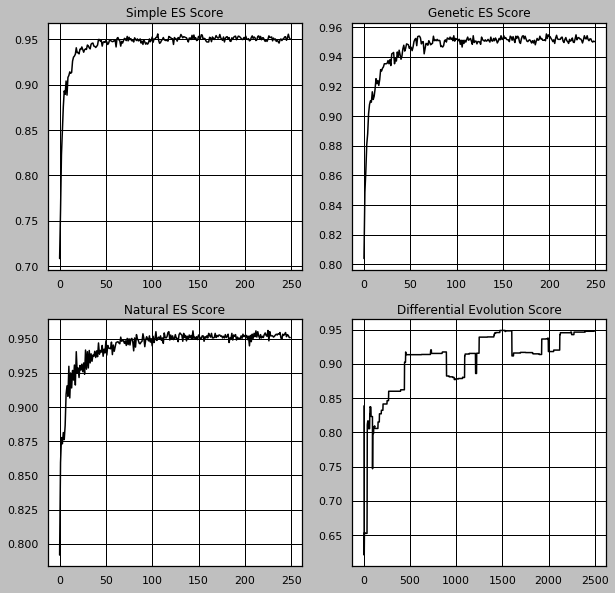

In [23]:
score(CrossEntropyObjective(), iterations=250)

The DE score history graph is very strange looking. We'll experiment with the NaturalES hyperparameters, then do the same with DE.

100%|██████████| 2500/2500 [01:15<00:00, 33.31it/s]
              precision    recall  f1-score   support

       False       0.97      0.98      0.98      1181
        True       0.91      0.85      0.88       226

    accuracy                           0.96      1407
   macro avg       0.94      0.92      0.93      1407
weighted avg       0.96      0.96      0.96      1407

Accuracy: 0.9630419331911869
Balanced Accuracy: 0.9171581006047073


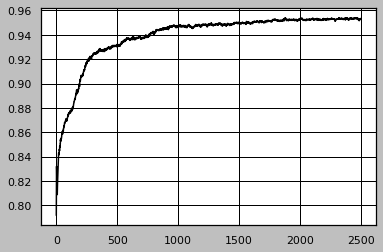

In [24]:
nes = NaturalESClassifier(objective=CrossEntropyObjective(), n_iter=2500, random_state=0, alpha=0.004)
nes.fit(X_train_std, y_train)
plt.plot(range(2500), nes.history_)
y_pred = nes.predict(X_test_std)
print(classification_report(y_test, y_pred))
print("Accuracy: %s" % accuracy_score(y_test, y_pred))
print("Balanced Accuracy: %s" % balanced_accuracy_score(y_test, y_pred))

100%|██████████| 750/750 [01:22<00:00,  9.13it/s]
              precision    recall  f1-score   support

       False       0.97      0.99      0.98      1181
        True       0.93      0.83      0.88       226

    accuracy                           0.96      1407
   macro avg       0.95      0.91      0.93      1407
weighted avg       0.96      0.96      0.96      1407

Accuracy: 0.9630419331911869
Balanced Accuracy: 0.9100020231841921


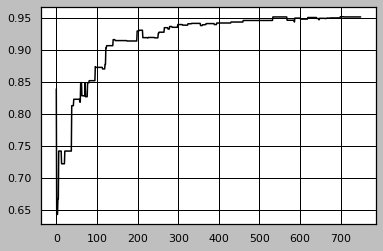

In [25]:
dev = DifferentialEvolutionClassifier(objective=CrossEntropyObjective(), n_iter=750, random_state=None, n_pop=200, bounds=(-10, 10), F=0.1)
dev.fit(X_train_std, y_train)
plt.plot(range(750), dev.history_)
y_pred = dev.predict(X_test_std)
print(classification_report(y_test, y_pred))
print("Accuracy: %s" % accuracy_score(y_test, y_pred))
print("Balanced Accuracy: %s" % balanced_accuracy_score(y_test, y_pred))

In [26]:
nes = NaturalESClassifier(objective=CrossEntropyObjective(), n_iter=2500, random_state=0, alpha=0.004)
nes = make_pipeline(StandardScaler(), nes)
nes_score = cross_val_score(nes, X, y)

dev = DifferentialEvolutionClassifier(objective=CrossEntropyObjective(), n_iter=750, random_state=None, n_pop=200, bounds=(-10, 10), F=0.1)
dev = make_pipeline(StandardScaler(), dev)
dev_score = cross_val_score(dev, X, y)

log = make_pipeline(StandardScaler(), LogisticRegression())
log_score = cross_val_score(log, X, y)

100%|██████████| 750/750 [00:50<00:00, 14.90it/s]


In [27]:
print("NaturalESClassifier Accuracy:             %0.5f (+/- %0.5f)" % (nes_score.mean(), nes_score.std() * 2))
print("DifferentialEvolutionClassifier Accuracy: %0.5f (+/- %0.5f)" % (dev_score.mean(), dev_score.std() * 2))
print("LogisticRegression Accuracy:              %0.5f (+/- %0.5f)" % (log_score.mean(), log_score.std() * 2))

NaturalESClassifier Accuracy:             0.95157 (+/- 0.00766)
DifferentialEvolutionClassifier Accuracy: 0.95072 (+/- 0.00924)
LogisticRegression Accuracy:              0.95349 (+/- 0.01161)
